<a href="https://colab.research.google.com/github/DivyamNigam/Square_to_Cube_to_4D-Cube/blob/main/Square_to_Cube_to_Teserract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training Neural Networks to present a 2d Squre in 3d and 4d**

In [96]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

**Generating Training Data**

In [18]:
squares = []
cubes = []
tesseract=[]

for a in range(1000):
    a = random.randint(1,100)

    # Define custom vertices for the square
    square = [[0, 0], [a, 0], [a, a], [0, a]]
    squares.append(square)

    # Define custom vertices for the cube
    cube = ([
    [0, 0, 0],  # vertex 0
    [a, 0, 0],  # vertex 1
    [a, a, 0],  # vertex 2
    [0, a, 0],  # vertex 3
    [0, 0, a],  # vertex 4
    [a, 0, a],  # vertex 5
    [a, a, a],  # vertex 6
    [0, a, a],])
    cubes.append(cube)

    tesseracts=([
    [0, 0, 0, 0],  # vertex 0
    [a, 0, 0, 0],  # vertex 1
    [a, a, 0, 0],  # vertex 2
    [0, a, 0, 0],  # vertex 3
    [0, 0, a, 0],  # vertex 4
    [a, 0, a, 0],  # vertex 5
    [a, a, a, 0],  # vertex 6
    [0, a, a, 0],  # vertex 7
    [0, 0, 0, a],  # vertex 8
    [a, 0, 0, a],  # vertex 9
    [a, a, 0, a],  # vertex 10
    [0, a, 0, a],  # vertex 11
    [0, 0, a, a],  # vertex 12
    [a, 0, a, a],  # vertex 13
    [a, a, a, a],  # vertex 14
    [0, a, a, a],])
    tesseract.append(tesseracts)
# Convert the lists of vertices to NumPy arrays
X = np.array(squares, dtype=object)
Y = np.array(cubes, dtype=object)
Z = np.array(tesseract, dtype=object)
print(X.shape)
print(Y[:1])
print(Z.shape)

(1000, 4, 2)
[[[0 0 0]
  [20 0 0]
  [20 20 0]
  [0 20 0]
  [0 0 20]
  [20 0 20]
  [20 20 20]
  [0 20 20]]]
(1000, 16, 4)


In [4]:
X_tens = tf.convert_to_tensor(X, dtype=tf.float32)
Y_tens = tf.convert_to_tensor(Y, dtype=tf.float32)
Z_tens = tf.convert_to_tensor(Z, dtype=tf.float32)
print(X_tens.shape)
print(Y_tens.shape)
print(Z_tens.shape)

(1000, 4, 2)
(1000, 8, 3)
(1000, 16, 4)


# **1st NN to transform 2d input to 3D**

In [5]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(24),
    tf.keras.layers.Reshape((8,3))
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_tens,Y_tens, epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3428.8152 
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 845.8604  
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 187.1522 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2758 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2410 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0141 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 

**Giving 2D input to get 3D coordinates**

In [35]:
a = tf.constant([[0,0],[24,0],[24,24],[0,24]]) # Pass a list of lists to creat a 2D tensor.
b=model.predict(tf.expand_dims(a, axis=0))
print(tf.round(b))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
tf.Tensor(
[[[ 0.  0.  0.]
  [24. -0.  0.]
  [24. 24.  0.]
  [-0. 24. -0.]
  [ 0. -0. 24.]
  [24. -0. 24.]
  [24. 24. 24.]
  [ 0. 24. 24.]]], shape=(1, 8, 3), dtype=float32)


Plotting 3D Cube

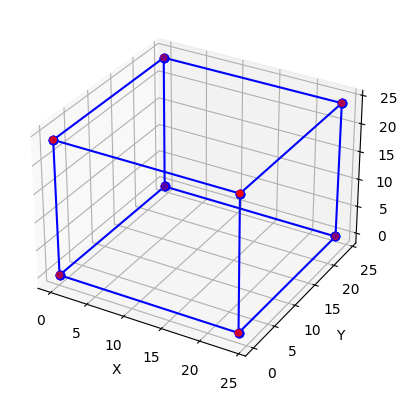

In [7]:
# Extract coordinates from tensor
coords = b[0]  # Shape (8, 3)

# Define the edges of the cube by connecting vertices
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # Bottom face
    [4, 5], [5, 6], [6, 7], [7, 4],  # Top face
    [0, 4], [1, 5], [2, 6], [3, 7]   # Vertical edges
]

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot edges
for edge in edges:
    x = [coords[edge[0]][0], coords[edge[1]][0]]
    y = [coords[edge[0]][1], coords[edge[1]][1]]
    z = [coords[edge[0]][2], coords[edge[1]][2]]
    ax.plot(x, y, z, 'bo-')  # 'bo-' for blue color, circle markers, and solid lines

# Scatter plot of the vertices
ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='red', marker='o')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show plot
plt.show()


2nd NN to take the 3D output from 1st NN and give 4D coordinates as output

In [8]:
model2= tf.keras.Sequential([
    tf.keras.Input(shape=(8,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Reshape((16,4))
])
model2.compile(optimizer='adam',loss='mse')
model2.fit(Y_tens,Z_tens,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1425.4827   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 144.6586 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3645  
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1553
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010     
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010     
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011     
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8337e-04
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9587e-04
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

Predicting 4D cordinates from 3D coordinates input

In [65]:
b=tf.maximum(b,0)
b=tf.squeeze(b)
d=model2.predict(tf.expand_dims(b, axis=0))
print(d)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[[-8.2902070e-03 -6.4897388e-02 -2.0626590e-02  2.7236685e-02]
  [ 2.4063118e+01  1.6585007e-02 -6.7085978e-03 -3.0620083e-02]
  [ 2.4012037e+01  2.3996090e+01 -1.3135329e-02  1.8731240e-02]
  [-9.7616948e-04  2.3997065e+01 -1.5432682e-02 -3.8688723e-02]
  [ 3.4430929e-02 -4.3747660e-02  2.3994947e+01  6.3343160e-04]
  [ 2.4047213e+01 -1.5057521e-02  2.4037930e+01 -2.8811414e-03]
  [ 2.4052628e+01  2.3993484e+01  2.4029762e+01 -4.4405423e-03]
  [-3.2714373e-03  2.3989445e+01  2.4002192e+01 -4.0220004e-04]
  [ 4.2472642e-02  8.2932059e-03  2.7300429e-02  2.4038374e+01]
  [ 2.4034569e+01  1.0481484e-02 -3.0487336e-02  2.4022331e+01]
  [ 2.4022741e+01  2.4011633e+01  1.2914417e-04  2.4035151e+01]
  [-1.0986455e-02  2.4011988e+01 -2.2052079e-03  2.4019255e+01]
  [-1.3316147e-02  1.3864264e-03  2.4008379e+01  2.4053204e+01]
  [ 2.4032698e+01  2.5965944e-02  2.4056364e+01  2.4014080e+01]
  [ 2.4026127e+01  2.3994576e+01  2.4025845e+01  2.4005039e+01]
  

# **Plotting the 4d Cube in 3D**

In [97]:
#Converting the predict tensor of 1,16,4 to 16,3 to be plotted in 3d
d=tf.squeeze(d)
d=d[:,:3]
print(d.shape)

(16, 3)


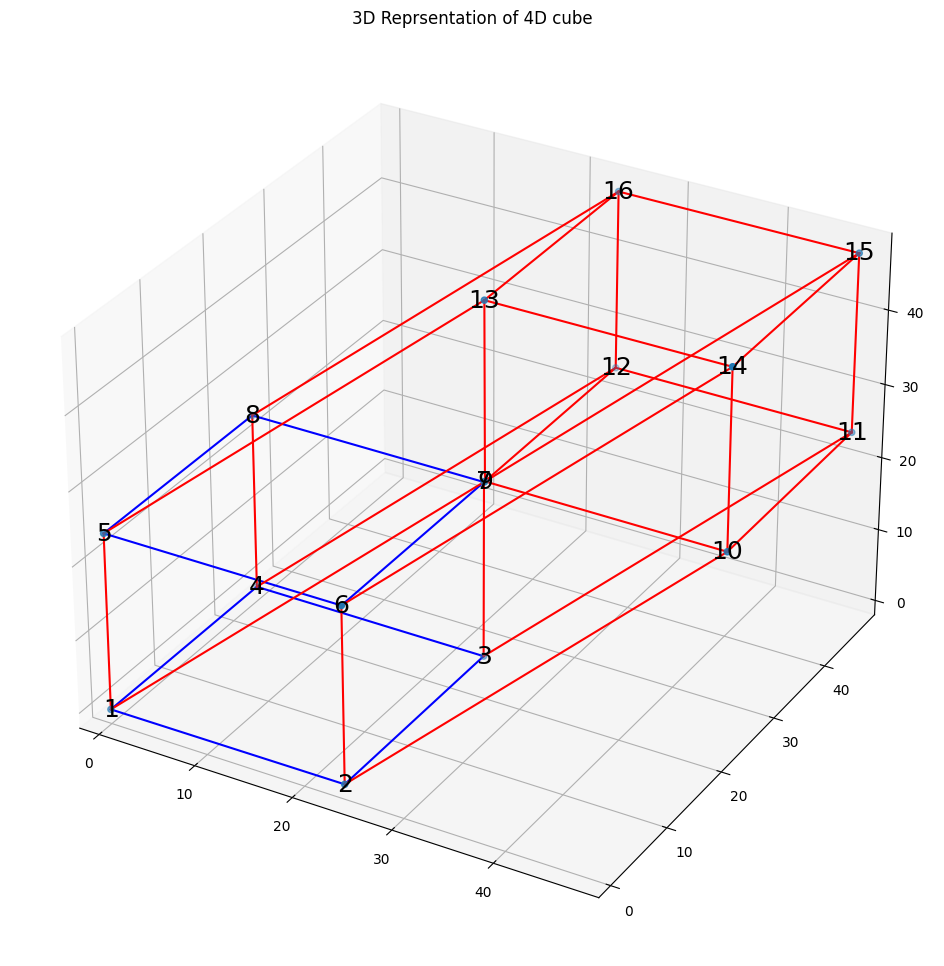

In [102]:
plt.rcParams['figure.figsize'] = [12, 12]

k= d[1,0]

# Define cube vertices
# Adding k which is first x coordinate of the 3d cube to coordinates of 4d cube from range of 8 to 16

# Mask for rows 8 to 15
mask = tf.cast(tf.range(16) >= 8, tf.float32)[:, tf.newaxis]

# Add k to values in rows 8 to 16
new_tensor = d + k * mask

vertices=new_tensor

# Define edges of the cube
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7],
    [8, 9], [9, 10], [10, 11], [11, 8],
    [12, 13], [13, 14], [14, 15], [15, 12],
    [8, 12], [9, 13], [10, 14], [11, 15],
    [0, 8], [1, 9], [2, 10], [3, 11],
    [4, 12], [5, 13], [6, 14], [7, 15]
]


# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])


# Plot edges
for i, edge in enumerate(edges): # Use enumerate to get the index of each edge
    if i<=7:
      ax.plot3D(*zip(vertices[edge[0]], vertices[edge[1]]), c='b')
    else:
      ax.plot3D(*zip(vertices[edge[0]], vertices[edge[1]]), c='r')

# Label vertices
for i, vertex in enumerate(vertices):
    ax.text(vertex[0], vertex[1], vertex[2], str(i+1),fontsize=18, ha='center', va='center')

# Set axis limits
ax.set_xlim(-1, 2*k+1)
ax.set_ylim(-1, 2*k+1)
ax.set_zlim(-1, 2*k+1)
plt.title('3D Reprsentation of 4D cube')

# Show plot
plt.show()